# Econometric Data Science ( HS 421 )
### *Instructor* : Dr. Sunil Paul

## End Semester assessment: **Question 4**

### Authors ( Group 12 )
- Sanjay Marreddi
- Rishabh Tripathi
- Nishant Kumar
- Yash Narnaware


### **1. Develop a suitable regression model to explain the growth rate of income using one or more of the variables from the dataset and interpret your results.**

To develop a regression model that can explain the growth rate of Income `gdpgr` in a better way, Lets start with **Data Analysis**, followed by **OLS Model** & incrementally develop a better regression Model, say **Quantile Regression Model**. 

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd  
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import statsmodels.regression.quantile_regression as Q_reg

from sklearn import metrics
from statsmodels.compat import lzip
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the provided file
Input_df = pd.read_excel('Q4.xlsx')
Input_df.head()

,country,gdp60vus,gdpgr,noneqinv,equipinv,lfgr6085,continent
0,Tanzania,-3.909975,0.027319,0.1656,0.0149,0.027268,1
1,Ethiopia,-3.874197,0.013414,0.0488,0.0060,0.020364,1
2,Lesotho,-3.655754,0.056505,NaN,NaN,0.017348,1
3,Burma,-3.501836,0.026965,NaN,NaN,0.020524,2
4,Uganda,-3.493806,0.007123,0.0371,0.0048,0.030981,1


In [ ]:
# Examining the data
Input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    106 non-null    object 
 1   gdp60vus   106 non-null    float64
 2   gdpgr      106 non-null    float64
 3   noneqinv   88 non-null     float64
 4   equipinv   88 non-null     float64
 5   lfgr6085   106 non-null    float64
 6   continent  106 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.9+ KB


In [ ]:
# Filling the Missing (NaN) Values
Input_df = Input_df.interpolate()
Input_df.head()

,country,gdp60vus,gdpgr,noneqinv,equipinv,lfgr6085,continent
0,Tanzania,-3.909975,0.027319,0.1656,0.0149,0.027268,1
1,Ethiopia,-3.874197,0.013414,0.0488,0.0060,0.020364,1
2,Lesotho,-3.655754,0.056505,0.0449,0.0056,0.017348,1
3,Burma,-3.501836,0.026965,0.0410,0.0052,0.020524,2
4,Uganda,-3.493806,0.007123,0.0371,0.0048,0.030981,1


In [ ]:
# Getting an overview of data
Input_df.describe()

,gdp60vus,gdpgr,noneqinv,equipinv,lfgr6085,continent
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,-1.870546,0.020892,0.137481,0.038991,0.020574,2.716981
std,0.956000,0.017428,0.056523,0.033006,0.008205,1.855518
min,-3.909975,-0.022270,0.029900,0.000200,0.001391,1.000000
25%,-2.539188,0.009980,0.100825,0.012850,0.015390,1.000000
50%,-1.835132,0.019285,0.136975,0.029050,0.020640,2.000000
75%,-1.077530,0.032604,0.173130,0.059490,0.027112,4.000000
max,0.000000,0.075709,0.280300,0.148200,0.037067,6.000000


Now, Let us perform **OLS** on the Input data & see what conclusions can be drawn. Let `gdpgr` be Y.

`Y = B0 + B1*gdp60vus + B2*noneqinv + B3*equipinv + B4*lfgr6085 +  error`

In [ ]:
# Grabbing the Values of the Independent & Dependent Variables into arrays.
X = Input_df[['gdp60vus', 'noneqinv','equipinv', 'lfgr6085']]
Y = Input_df[['gdpgr']].values

# Splitting the Data into Training & Testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, random_state=2)

In [ ]:
# Instatiating and fitting the Training data into the model.
OLS = LinearRegression()
OLS.fit(X_train,Y_train)

# Making prediction on Testing data.
predicted_values = OLS.predict(X_test)

In [ ]:
# Making a list of the Parameters estimated by the model.
Beta_values_list = list(OLS.intercept_)
Beta_values_list = Beta_values_list + list(OLS.coef_[0])

# Printing the Values of the estimated Parameters.
for i in range(len(Beta_values_list)):
  print("β"+ str(i)+ " --> " + str(Beta_values_list[i]) )

# Printing the results of Evaluation metrics for the model.
print("r2-score --> ", r2_score(Y_test, predicted_values))
print("Mean absolute error --> ",np.mean(Y_test-predicted_values))

β0 --> -0.01198535076944135
β1 --> -0.007999405843690445
β2 --> 0.07829563656374605
β3 --> 0.2587080955669804
β4 --> -0.13342046883947395
r2-score -->  0.4335168327858683
Mean absolute error -->  -0.003394128445233757


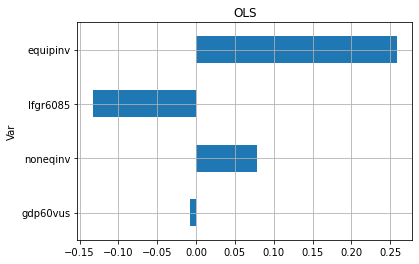

In [ ]:
# Plotting the coefficients in descending order
w = pd.DataFrame()
w['Var'] = X_train.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = OLS.coef_[0]
w['beta_abs'] = np.abs(w['beta']) # Get the absolute value for ranking
w = w.sort_values(by='beta_abs')
w['beta'].plot.barh()
plt.title('OLS')
plt.grid()
plt.show()

#### Conclusions drawn from the OLS :

- We know that OLS models the conditional mean. The conditional mean of Y given X=x is defined as: E[Y|X=x]. It resulted in an R-squared 0.43 on the Test Data.


- The above plot shows the independent variables in descending order of their coefficients. `equipinv` has the strongest influence to the mean of `gdpgr`, followed by `lfgr6085`, `noneqinv` and `gdp60vus`.

- The above OLS provides only a partial view of the relationships between `gdpgr` and other varables. We are interested in describing the relationship at various points in the conditional distribution of dependent variable `gdpgr`. So Let's move onto Quantile Regression.

#### Quantile Regression 
- To explain the growth rate of income `gdpgr` in a better way, we will use 
Quantile Regression because : 
    - It models the entire conditional distribution of the target variable, while OLS only delivers the mean estimates.
    - It  is more robust to mis-specification of error distribution as it makes no assumption on the dependent variable distribution.
    - It is not sensitive to Outliers.
- Actually, here we use quantiles (synonymous to percentiles) to describe the distribution of the **dependent** variable `gdpgr`.

- We are going to model the relationship between Independent Variables (X) and the **conditional quantiles** of `gdpgr` (y).

- It thus gives us a more comprehensive picture of the effect of the Independent Variables on `gdpgr`.

- The equation can be described as 
$y_i = x_i'B_q + e_i$ where $B_q$ is a vector of parameters associated with the `qth` quantile. Unlike OLS, Its computataional implementation uses Linear Programming Methods as shown below.

- We are interested in the 1%, 25%, 50%(median), 75%, and 99% percentile of the dependent variable `gdpgr`. So, There will be five Quantile Regressions. Since there are five different models, the variable coefficients shall vary.



In [ ]:
quantiles = [0.01, 0.25, 0.50, 0.75, 0.99]

# Get the model, the cofficients and the predictions.
def QuantReg(q):
   # Modeling 
   mod = Q_reg.QuantReg(Y_train, X_train).fit(q=q)
    
   # Get the coefficients and the lower and upper bounds
   coefficients = pd.DataFrame()
   coefficients['param'] = mod.params
   coefficients = pd.concat([coefficients,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefficients['q'] = q
   coefficients.columns = ['beta','beta_lower','beta_upper','quantile']
    
   # Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return coefficients, pred

QuantReg_coefficients = pd.DataFrame()
QuantReg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    coefficients, pred = QuantReg(q)
    QuantReg_coefficients = pd.concat([QuantReg_coefficients,coefficients])
    QuantReg_actual_pred = pd.concat([QuantReg_actual_pred,pred],axis=1)

QuantReg_actual_pred.columns=quantiles
QuantReg_actual_pred['actual'] = Y_test
QuantReg_actual_pred['interval'] = QuantReg_actual_pred[0.99] - QuantReg_actual_pred[0.01]
QuantReg_actual_pred = QuantReg_actual_pred.sort_values('interval').reset_index(drop=True)
QuantReg_actual_pred

,0.01,0.25,0.5,0.75,0.99,actual,interval
0,-0.00,0.01,0.02,0.03,0.04,0.016655,0.04
1,-0.02,0.00,0.01,0.02,0.02,0.012901,0.04
2,-0.00,0.02,0.03,0.04,0.05,0.043470,0.05
3,-0.02,0.01,0.01,0.03,0.06,-0.010255,0.08
4,-0.02,0.01,0.02,0.03,0.06,0.026435,0.08
5,-0.02,0.01,0.02,0.04,0.07,0.010578,0.09


In [ ]:
r2 = metrics.r2_score(QuantReg_actual_pred['actual'], QuantReg_actual_pred[0.5]).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.53


              beta  beta_lower  beta_upper  quantile  beta_abs
gdp60vus  0.002881         NaN         NaN      0.01  0.002881
noneqinv -0.043874         NaN         NaN      0.01  0.043874
equipinv  0.368636         NaN         NaN      0.01  0.368636
lfgr6085 -0.515697         NaN         NaN      0.01  0.515697
              beta  beta_lower  beta_upper  quantile  beta_abs
gdp60vus -0.002241   -0.005676    0.001193      0.25  0.002241
noneqinv  0.023468   -0.045744    0.092680      0.25  0.023468
lfgr6085 -0.177066   -0.520300    0.166168      0.25  0.177066
equipinv  0.206151    0.065655    0.346646      0.25  0.206151
              beta  beta_lower  beta_upper  quantile  beta_abs
gdp60vus -0.004088   -0.007492   -0.000684       0.5  0.004088
noneqinv  0.044920   -0.021811    0.111650       0.5  0.044920
lfgr6085 -0.107763   -0.503253    0.287727       0.5  0.107763
equipinv  0.215267    0.076532    0.354001       0.5  0.215267
              beta  beta_lower  beta_upper  quantile  b

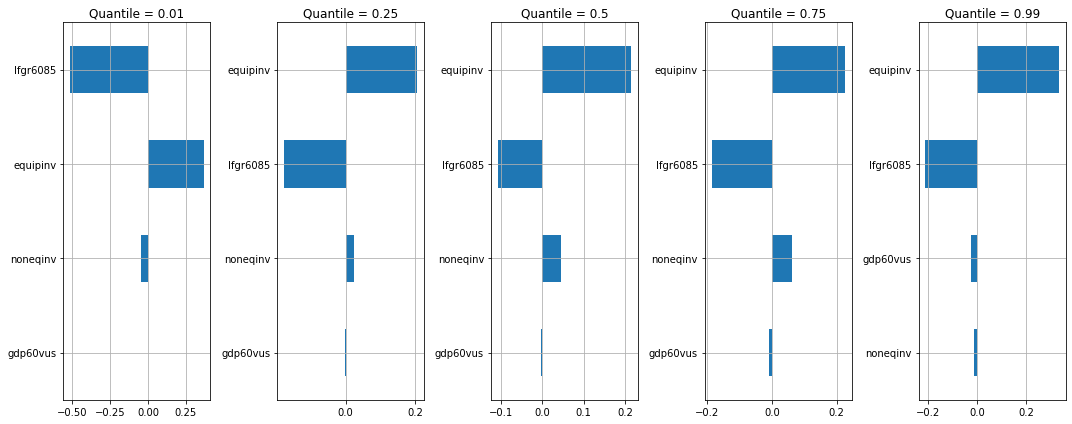

In [ ]:
# Get the absolute value of the coefficients for ranking
QuantReg_coefficients['beta_abs'] = np.abs(QuantReg_coefficients['beta'] ) 
QuantReg_coefficients = QuantReg_coefficients.sort_values(by=['quantile','beta_abs'])

fig = plt.figure(figsize=(15, 6))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = QuantReg_coefficients[QuantReg_coefficients['quantile']==quantiles[i]]
    print(w)
    w['beta'].plot.barh()
    plt.grid()
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

#### Conclusions drawn  from the Quantile Regression :
- The coefficients of the five quantile regression models are plotted in the above bar charts. The coefficients are ranked in descending order by their absolute value.

- The interesting observation is the variable ranking in the five quantile regression models varied.

- Except for the 1% percentile, `equipinv` had a stronger and positive impact on `gdpgr` among all the other variables. In case of 1% quantile,  `lfgr6085` had a stronger and positive impact and `equipinv` is in second place.

- We can also notice that among 25, 50, 75 percentiles, the relative ordering in descending order is same. But in case of 99 percentile,  `gdp60vus` has more impact than `noneqinv`.

- In all the quantiles, `lfgr6085` always has an negative impact on the  `gdpgr`. 

- In more precise terms, We can interpret coefficients as follows :

- 
Countries that have 1 unit more **Equipment investment for the country in 1960–1985** (`equipinv`) will have a 0.4 increment of `gdpgr`  at the 1% quantile & 0.2 increment of `gdpgr`  at the 25% quantile & 0.25 increment of `gdpgr`  at the 50% quantile & 0.2 increment of `gdpgr`  at the 75% quantile & 0.4 increment of `gdpgr`  at the 99% quantile.

Similarly each coefficient at each quantile can be interpreted to explain their effect on growth rate of income (`gdpgr`)



###**2. Since the data are cross-sectional, you are likely to encounter heteroscedasticity. Use one or more tests discussed in the class to find out if in fact there is heteroscedasticity.**



By **heteroskedasticity** we mean that the variance of the unobservable error conditional on explanatory variables, is **not constant**. 

Say if $y_i = x_i'B + e_i $, Var(e) is not constant. The reason being the variation in the dependent variable usually remains constant when the level of one or more independent variables increases or decreases. 

Now lets perform some tests to detect the presence of heteroskedasticity in the given data.

**1. Lets check the plots of each independent variable with our dependent variable to interpret the relationships between them & see if they may cause heteroskedasticity.**

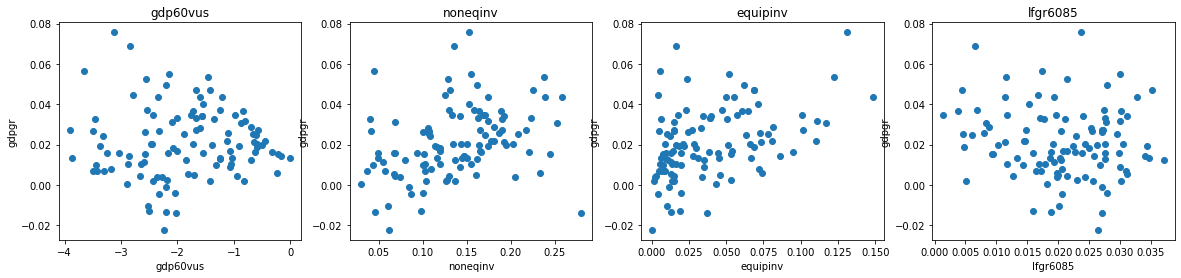

In [ ]:
# Let us find the relationships between gdpgr and other variables.
plt.figure(figsize=(20, 4))
features = ['gdp60vus', 'noneqinv','equipinv','lfgr6085']
target = Input_df.gdpgr

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Input_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('gdpgr')

- From the above plots, Its very clear that all the above independent varaibles ( gdp60vus, noneqinv, equipinv, lfgr6085 ) tend to cause some heteroskedasticity due to the spread i.e. **Variance is varying widely.**

**2. Now Lets check the presence of heteroskedastic error by plotting the squares of errors obtained after fitting a OLS Model to the input data.**

(array([54., 17., 10.,  4.,  3.,  2.,  3.,  1.,  4.,  1.,  0.,  0.,  3.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([1.45352875e-08, 7.76711126e-05, 1.55327690e-04, 2.32984267e-04,
        3.10640845e-04, 3.88297422e-04, 4.65953999e-04, 5.43610576e-04,
        6.21267154e-04, 6.98923731e-04, 7.76580308e-04, 8.54236886e-04,
        9.31893463e-04, 1.00955004e-03, 1.08720662e-03, 1.16486319e-03,
        1.24251977e-03, 1.32017635e-03, 1.39783293e-03, 1.47548950e-03,
        1.55314608e-03, 1.63080266e-03, 1.70845924e-03, 1.78611581e-03,
        1.86377239e-03, 1.94142897e-03]),
 <a list of 25 Patch objects>)

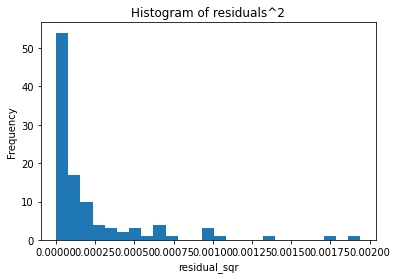

In [ ]:
OLS_model= sm.OLS(Input_df.gdpgr, Input_df[['gdp60vus', 'noneqinv','equipinv','lfgr6085']])
plt.title("Histogram of residuals^2")
plt.xlabel("residual_sqr")
plt.ylabel("Frequency")
plt.hist(OLS_model.fit().resid**2, bins='auto')

- The above Histogram looks skewed which gives some sense of presence of heteroscedasticity in the model.

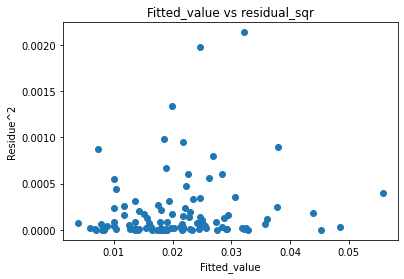

In [ ]:
OLS = LinearRegression()
OLS.fit(X_train,Y_train)

# Making prediction on Testing data.
Fitted_value = OLS.predict(X_train)

residual_sqr = (Fitted_value - Y_train)**2          
plt.scatter(Fitted_value, residual_sqr )
plt.title("Fitted_value vs residual_sqr")
plt.ylabel("Residue^2")
plt.xlabel("Fitted_value")
plt.show()

- The above scatter plot which is between square of errors vs fitted model, also looks more scattered which is inturn an indication of presence of heteroscedasticity in the model.

**Now Lets perform some Formal tests for Heteroscedasticity such as 
Bresuch-pagan test and White test.**

#### **Bresuch and Pagan Test**

In [ ]:
lr_model = OLS_model.fit()
breuschpagan_test = het_breuschpagan(lr_model.resid, lr_model.model.exog)

In [ ]:
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, breuschpagan_test)))

{'LM Statistic': 36.8534448752267, 'LM-Test p-value': 4.9418956701272665e-08, 'F-Statistic': 13.590884500645064, 'F-Test p-value': 6.460535074281494e-09}


- The values of the LM Statistic, LM-Test p-value, F-Statistic, F-Test p-value are as shown in the above output. Basically we get two test statistics and two p-values after performing Bresuch and Pagan Test. 

- It is known that Heteroskedasticity is indicated if p < 0.05.

- In the above output the P-values in both LM-Test and F-Test are < 0.05. **Hence `Bresuch and Pagan Test` indicates the presence of Heteroskedasticity.**


####**White Test**

In [ ]:
Input_df.head()

,country,gdp60vus,gdpgr,noneqinv,equipinv,lfgr6085,continent
0,Tanzania,-3.909975,0.027319,0.1656,0.0149,0.027268,1
1,Ethiopia,-3.874197,0.013414,0.0488,0.0060,0.020364,1
2,Lesotho,-3.655754,0.056505,0.0449,0.0056,0.017348,1
3,Burma,-3.501836,0.026965,0.0410,0.0052,0.020524,2
4,Uganda,-3.493806,0.007123,0.0371,0.0048,0.030981,1


In [ ]:
f ='gdpgr~gdp60vus+noneqinv+equipinv+lfgr6085'
lr_model = smf.ols(formula=f, data=Input_df).fit()

In [ ]:
white_test = het_white(lr_model.resid,  lr_model.model.exog)

In [ ]:
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, white_test)))

{'LM Statistic': 26.453017499765306, 'LM-Test p-value': 0.02265662088540303, 'F-Statistic': 2.161547909727024, 'F-Test p-value': 0.015201316992590091}


- The values of the LM Statistic, LM-Test p-value, F-Statistic, F-Test p-value are as shown in the above output. Basically we get two test statistics and two p-values after performing Bresuch and Pagan Test. 

- It is known that Heteroskedasticity is indicated if p < 0.05.

- In the above output the P-values in both LM-Test and F-Test are < 0.05. **Hence `White Test` also indicates the presence of Heteroskedasticity.**


#### Using the above 3-4 tests, we can conclude that there is **heteroscedasticity**.


###**3. Use the heteroscedasticity consistent std error to compare the results with those obtained by the usual OLS method. Explain**

Here is our usual OLS Model, We will compare it with updated Model which uses heteroscedasticity consistent std error.


In [ ]:
X = Input_df[['gdp60vus', 'noneqinv','equipinv', 'lfgr6085']]
Y = Input_df[['gdpgr']]

# Defining the Linear Probability Model
OLS_model = sm.OLS(Y, X)

# Fitting the Model
OLS_results =  OLS_model.fit()

In [ ]:
print(OLS_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  gdpgr   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              62.26
Date:                Tue, 18 May 2021   Prob (F-statistic):                    1.57e-26
Time:                        15:27:50   Log-Likelihood:                          297.36
No. Observations:                 106   AIC:                                     -586.7
Df Residuals:                     102   BIC:                                     -576.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Accounting for the heteroskedasticity**
- As we have detected that the errors are heteroskedastic. So, now we want to have a way to account for that.

**Precedure to remove heteroskedasticity present in model**

- So, The two main consequences of heteroskedasticity are 
 
 I. Transforming the data to logs.

 II. Using heteroskedasticity robust standard error,
 
This data contains some negative values also. so, we cannot transform data to logs, hence, Using heteroskedasticity **robust standard error**.






The formula for the robust covarience matrix is :-

  image049x.png, where X is the input matrix and S is the covariance matrix of the residuals.

In [ ]:
X = Input_df[["gdp60vus","noneqinv","equipinv", "lfgr6085"]]

Input_matrix_inv = np.linalg.inv(np.transpose(X).dot(X))   

robust_covariance_matrix = Input_matrix_inv.dot(np.transpose(X)).dot(np.diag(OLS_results.resid**2)).dot(X).dot(Input_matrix_inv)

In [ ]:
# After correction, printing results in a compact form.

# HC1 gives us the white standard errors and also adjusts for degree of freedom.
corrected_model_1 = OLS_results.get_robustcov_results(cov_type = "HC1").summary()
print(corrected_model_1)

                                 OLS Regression Results                                
Dep. Variable:                  gdpgr   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              66.73
Date:                Tue, 18 May 2021   Prob (F-statistic):                    1.27e-27
Time:                        15:27:50   Log-Likelihood:                          297.36
No. Observations:                 106   AIC:                                     -586.7
Df Residuals:                     102   BIC:                                     -576.1
Df Model:                           4                                                  
Covariance Type:                  HC1                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##### Correcting errors using inbuilt OLS method  (Additional Info)

In [ ]:
Corrected_model_2 = sm.OLS(Y, X).fit(cov_type = "HC1", use_t = True)
print(Corrected_model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  gdpgr   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              66.73
Date:                Tue, 18 May 2021   Prob (F-statistic):                    1.27e-27
Time:                        15:27:50   Log-Likelihood:                          297.36
No. Observations:                 106   AIC:                                     -586.7
Df Residuals:                     102   BIC:                                     -576.1
Df Model:                           4                                                  
Covariance Type:                  HC1                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- From above results, The standard errors obtained using the heteroskedasticity robust standard error model for gdp60vus, noneqinv, equipinv and lfgr6085 are 0.002, 0.031, 0.063, 0.155 respectively, in which we can see some of the robust standard errors are lower than the corresponding OLS standard error and some are higher that is the adjustment of  the errors.

- Accounting for the heteroscedasiticity has lower variances for our estimators i.e. the standard errors. hence, corrected model is a better model than previous OLS model.
- Here, we can see F-statistics has been increased to some statistically significant level. Hence the corrected_model_2 best describes the data, which has least variance in errors.

###**4. The objective of the De Long and Summers study was to investigate the effect of equipment investment on economic growth. What do the regression results suggest?**

Here is the interpretation of Regression results that helps in investigating the effect of equipment investment on economic growth:

- Actually, We are provided with the data of `equipinv` which is Equipment investment for the respective country in 1960–1985 and we are interpreting its effect on economic growth by gaining insights from the `gdpgr` which is the Growth rate of income per worker for a country averaged over 1960-1985.

- If we take our Initial model of **Linear Regression** into consideration, It suggests that for each unit increase in the equipment investment (`equipinv`) for a country there is an increase in the economic growth rate (`gdpgr`) by 0.2587080955669804.  Moreover, among all the other variables, equipment investment (`equipinv`) is the one that has stronger effect or positive correlation on economic growth.

- If we take **Quantile Regression**
 model,   It suggests that Countries that have 1 unit more Equipment investment (`equipinv`) will have
  -  0.368636 increment of `gdpgr`  at the 1% quantile  
  - 0.206151 increment of `gdpgr`  at the 25% quantile 
  - 0.215267 increment of `gdpgr`  at the 50% quantile 
  -  0.225809 increment of `gdpgr`  at the 75% quantile 
  - 0.334259  increment of `gdpgr`  at the 99% quantile.
-  So from above points, It is clear that Countries with very high or very less economic growth has more positive effect from Equipment investment on the entire economic growth than the countries with average economic growth rates.

- Except for the countries with lower growth rate , equipment investment ( `equipinv` ) had a stronger and positive impact on `gdpgr` among all the other variables. In case of those countries with lower growth rate, Growth rate of the labor force ( `lfgr6085` ) had a stronger and positive impact.

- Inshort, Our Model also interprets that **developing countries**
benefit from equipment investment.